# Penguin Classification

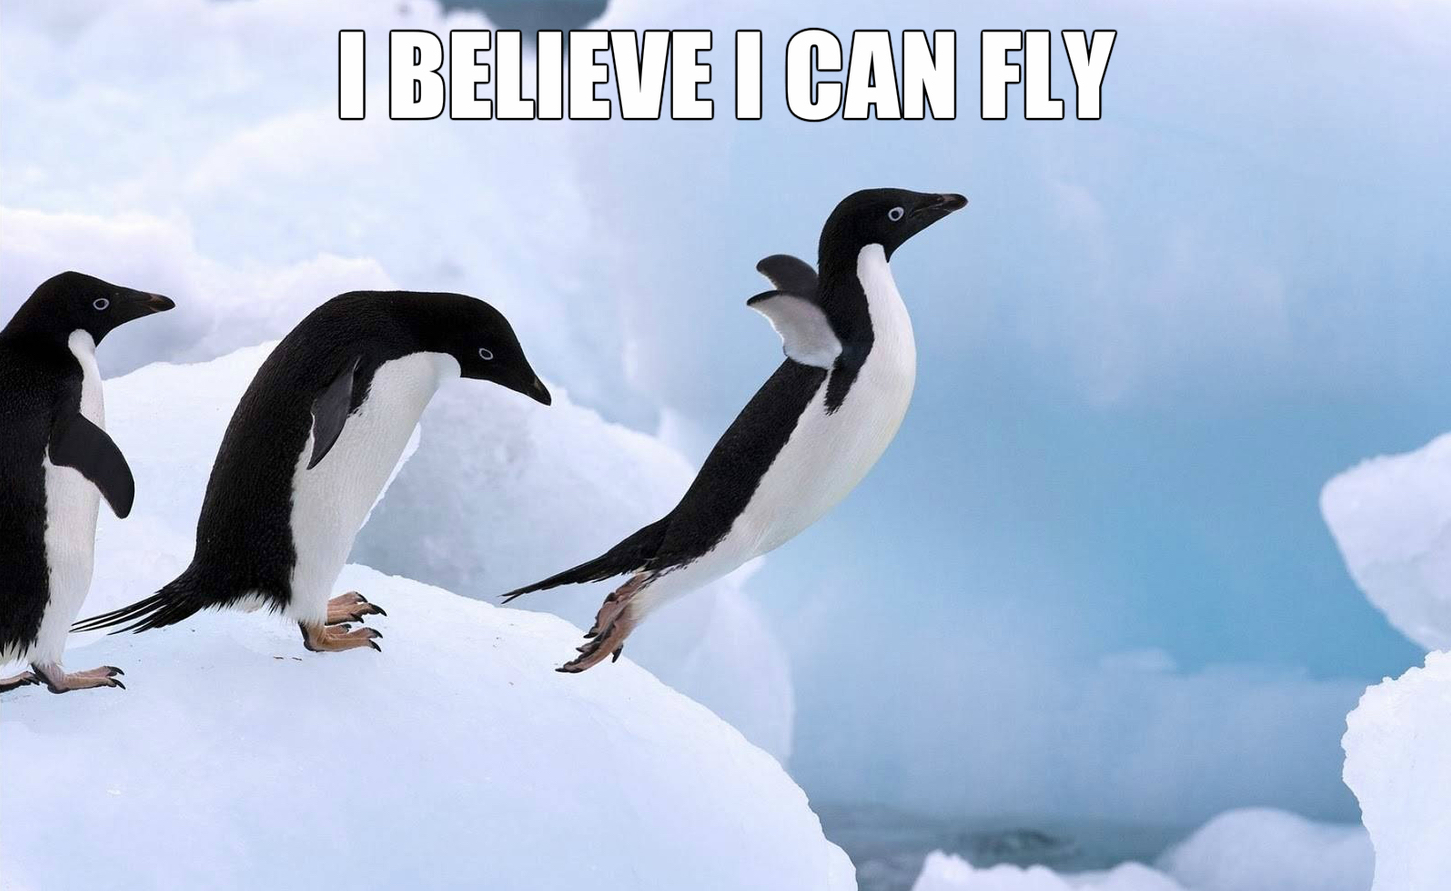

## About the Problem

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. The Palmer Long-Term Ecological Research (LTER) study area is located to the west of the Antarctic Peninsula extending South and North of the Palmer Basin from onshore to several hundred kilometers off shore. Palmer Station is one of the three United States research stations located in Antarctica. It is on Anvers Island midway down the Antarctic Peninsula at latitude 64.7 South, longitude 64.0 West.

The Palmer LTER studies a polar marine biome with research focused on the Antarctic pelagic marine ecosystem, including sea ice habitats, regional oceanography and terrestrial nesting sites of seabird predators.

Link: https://pallter.marine.rutgers.edu/

## Import Libraries

In [ ]:
import pandas as pd
import plotly.express as px

## Reading the dataset


### Create a df called penguin_df

In [ ]:
penguin_df = pd.read_csv('penguins.csv')

## Data Exploration

### First 5 Rows

In [ ]:
penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Last 2 Rows

In [ ]:
penguin_df.tail(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


### Length of Dataset?

In [ ]:
len(penguin_df)

344

### How many Different Species? What are their Names?

In [ ]:
penguin_df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
penguin_df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
penguin_df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
len(penguin_df['species'].unique())

3

### How many Different Islands are There? What are their Names?

In [ ]:
penguin_df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [ ]:
len(penguin_df.island.unique())

3

### What percent of the data is MALE? FEMALE?

In [ ]:
len(penguin_df[penguin_df['sex'] == 'MALE']) / len(penguin_df)

0.4883720930232558

In [ ]:
len(penguin_df[penguin_df['sex'] == 'FEMALE']) / len(penguin_df)

0.4796511627906977

### Describe the Different Numerical Columns in the Dataset

In [ ]:
penguin_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### How many Penguins are in each Species per Island?

In [ ]:
penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# group by columns to get summary statistics
penguin_df.groupby(['species', 'island'])['island'].count()

species    island   
Adelie     Biscoe        44
           Dream         56
           Torgersen     52
Chinstrap  Dream         68
Gentoo     Biscoe       124
Name: island, dtype: int64

## Visualizations

### Comparing Different Species' Bill Length

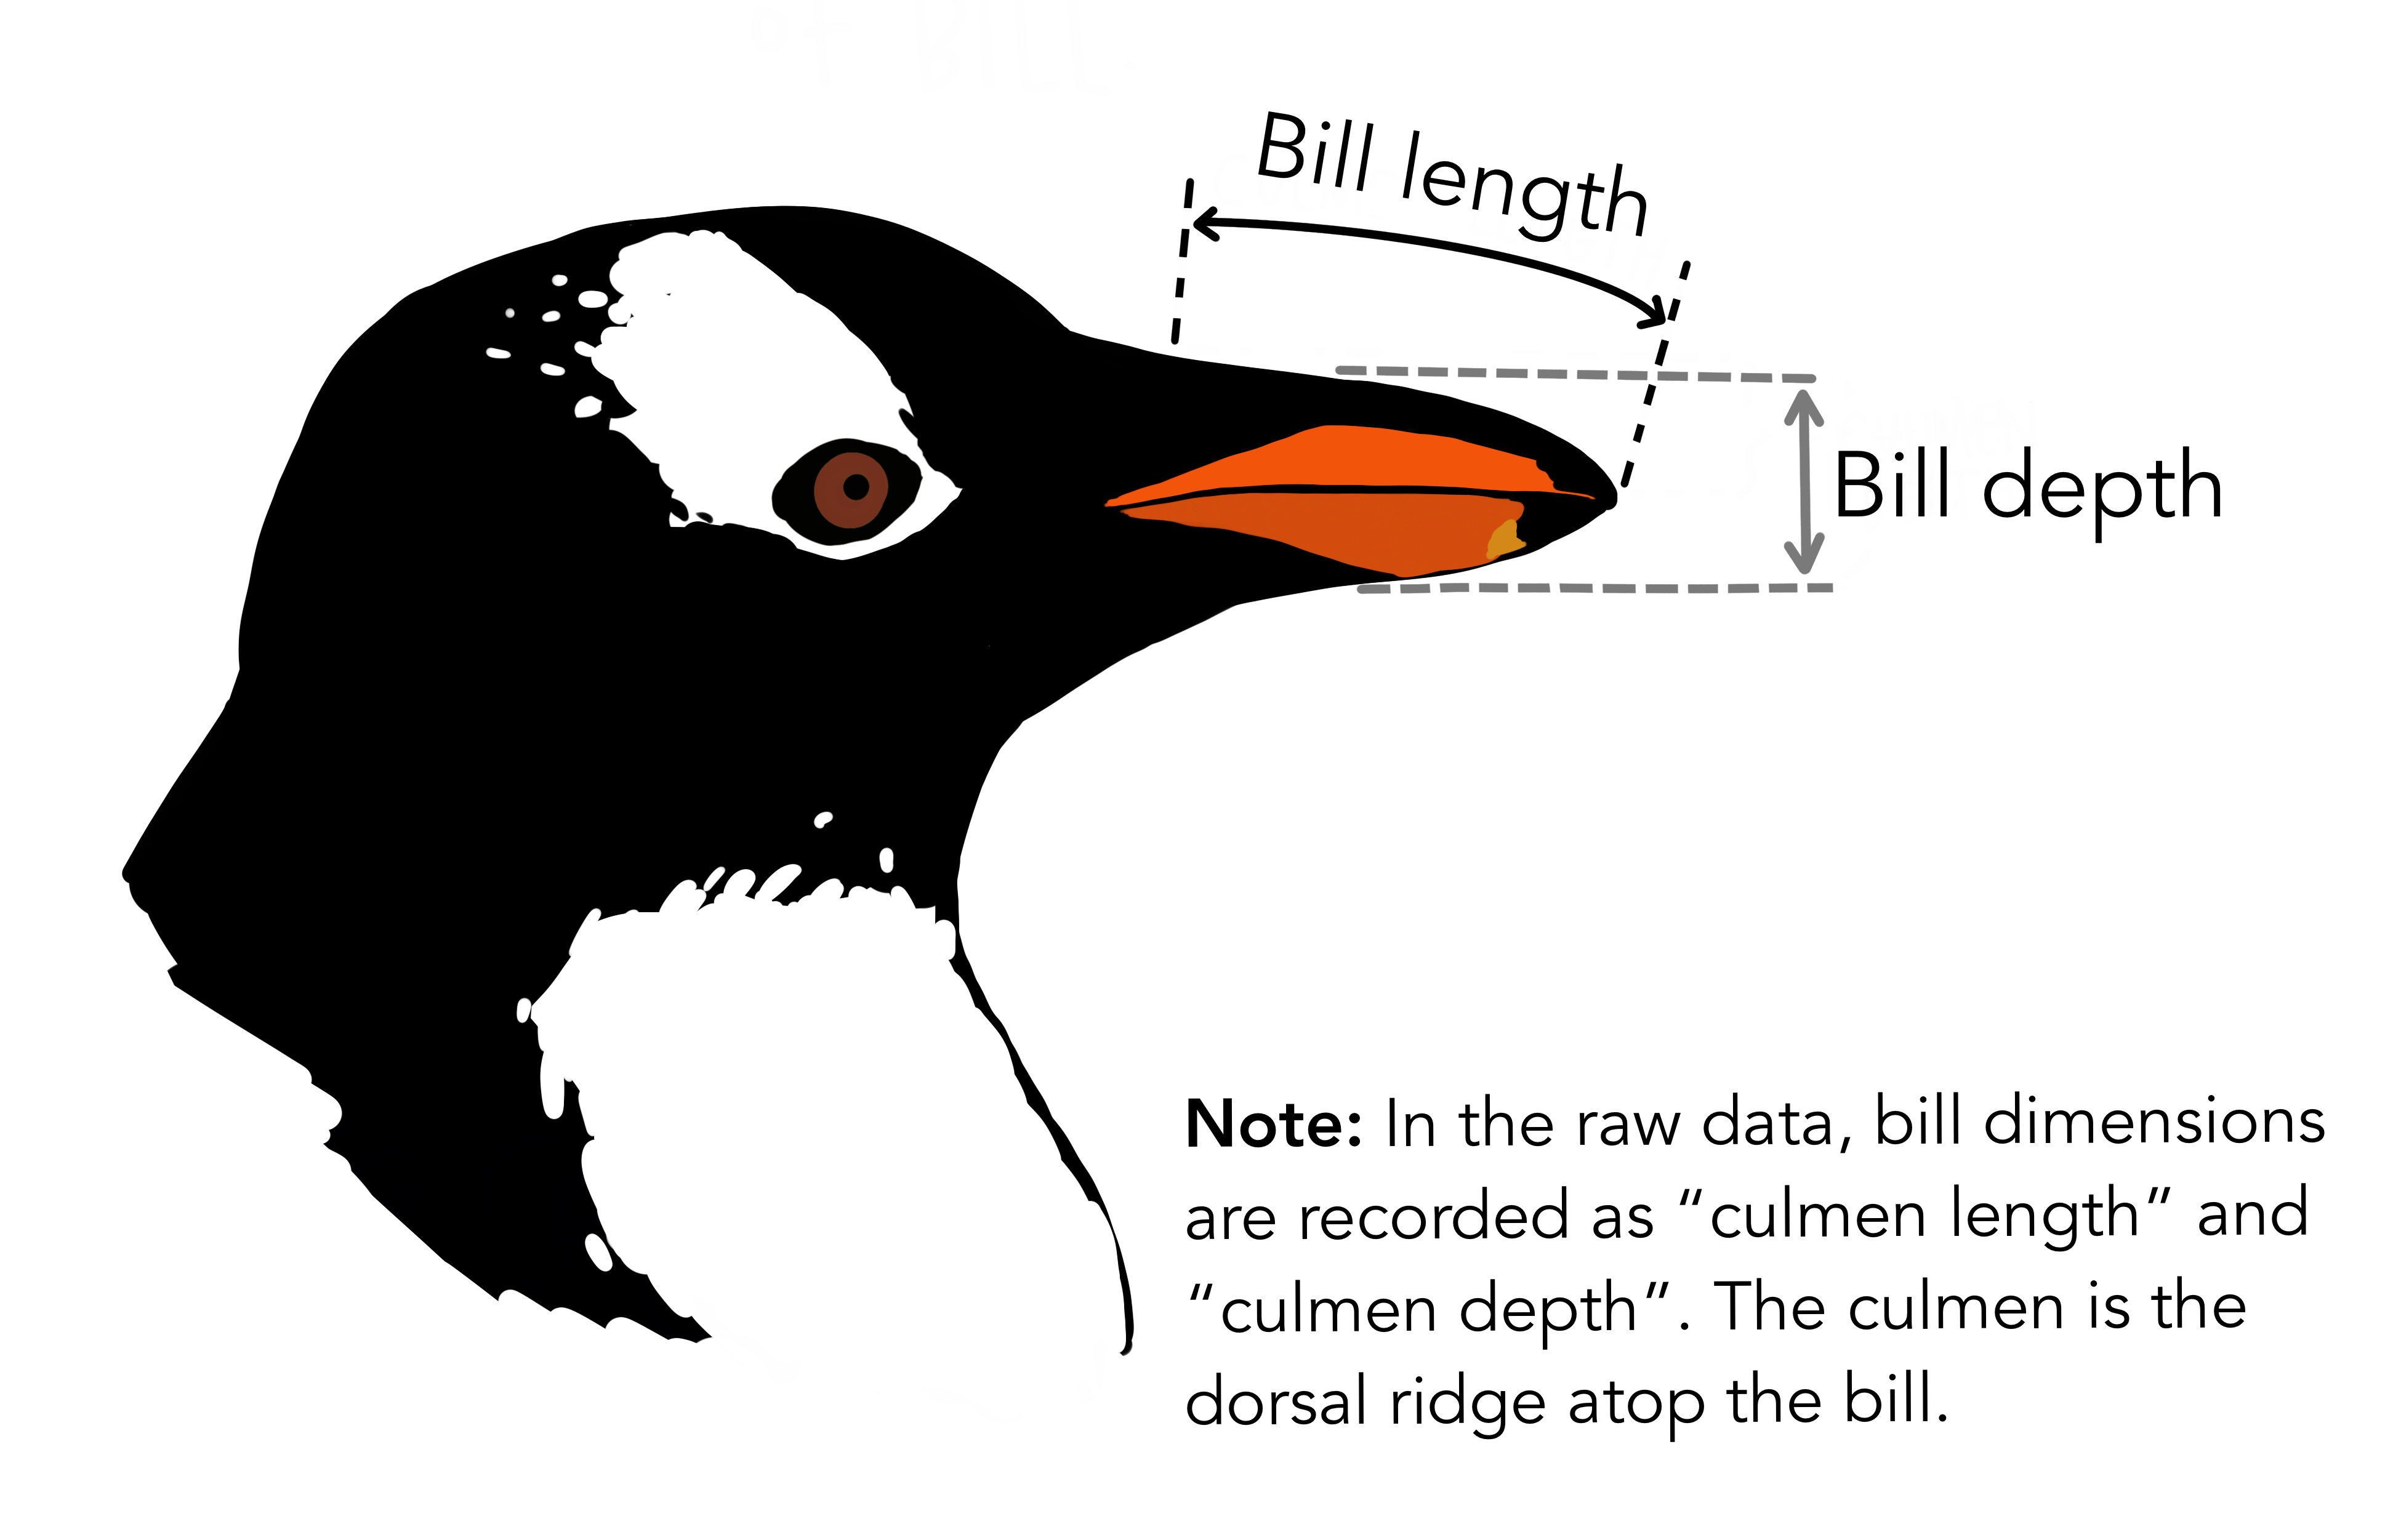

In [ ]:
penguin_df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
# Graph
fig = px.violin(
  penguin_df,
  y="bill_length_mm",
  x="island",
  color="species",
  box=True,
  points="all",
  hover_data=penguin_df.columns
)

# Formatting
fig.update_layout(
  title='Bill Length (mm) of Penguins',
  xaxis_title="Island",
    yaxis_title="Bill Length (mm)",
    legend_title="Species",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="Black"
    )
)
fig.show()

In [ ]:
for feature in ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']:

  # Graph
  fig = px.violin(
    penguin_df,
    y=feature,
    x="island",
    color="species",
    box=True,
    points="all",
    hover_data=penguin_df.columns
  )

  # Formatting
  fig.update_layout(
    title=f'{feature} of Penguins',
    xaxis_title="Island",
      yaxis_title=f"{feature}",
      legend_title="Species",
      font=dict(
          family="Courier New, monospace",
          size=14,
          color="Black"
      )
  )
  fig.show()


### Most Common Penguin Species on an Island

In [ ]:
fig = px.bar(
    penguin_df,
    x='island',
    color='species',
    title='Penguins per Island',
    #barmode='group'
)

# Formatting
# Commenting Command + /
fig.update_layout(
  xaxis_title="Island",
    yaxis_title=f"Count",
    legend_title="Species",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="Black"
    )
)
fig.show()

### Bill Length, Bill Depth, Flipper Length, and Body Mass Divided by Sex

In [ ]:
for feature in ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']:

  # Graph
  fig = px.violin(
    penguin_df,
    y=feature,
    x="sex",
    color="species",
    box=True,
    points="all",
    hover_data=penguin_df.columns
  )

  # Formatting
  fig.update_layout(
    title=f'{feature} of Penguins',
    xaxis_title="Sex",
      yaxis_title=f"{feature}",
      legend_title="Species",
      font=dict(
          family="Courier New, monospace",
          size=14,
          color="Black"
      )
  )
  fig.show()

## Classification: Predicting the Sex of a Penguin

#### Two Diff Types of ML Problems

1. Classification
Span or Not Spam
Irises into Versicolor, Setosa, and Somethin Else


2. Regression
We're tryna predict a numerical value
House Prices
Trajectory of a Stock
Predicting the popularity cong
Forecasting Quantity Sold

In [ ]:
penguin_df.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


## Decision Trees

```      
       penguins
    /    |       \
  To.   Biscoe     Dream
  |      |            \
adelie. flipper len.  bill len
          /   \        /  \
        >208  <=208.  >43  <43
         |       |   /      \
        gentoo  adelie      chinstrap
```

## Using kNN

## Using Decision Trees